In [3]:
import numpy as np # matematica
import pandas as ps # ciencias de dados
import matplotlib.pyplot as plt # grafica
import pandas_datareader.data as web # p importar dados do yahoo
import seaborn as sns #Melhorar visualização grafica 
import random

!pip install investpy
import investpy as inv

sns.set()

!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


     |████████████████████████████████| 4.4MB 7.9MB/s 
     |████████████████████████████████| 245kB 44.8MB/s 
     |████████████████████████████████| 5.5MB 48.8MB/s 
  Created wheel for investpy: filename=investpy-0.9.14-cp36-none-any.whl size=4469457 sha256=00a7d2d6cf3fb079eee8b288da8822ba40d30f7a565654236c627b813869116e
  Stored in directory: /root/.cache/pip/wheels/86/35/ee/fc38f22f1353037b5118cff64b62aeed42f63f2c84135eaaaa
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-i3ecr0u_
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-i3ecr0u_
     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp36-none-any.whl size=75764 sha256=205b8a05eb5f15850412eb8205d370ce061bdb1164c07f5db025e19377d53a18
  Stored in directory: /tmp/pip-

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [10]:
#nome = ps.DataFrame()
nome = ['CIEL3', 'HGTX3', 'POMO4', 'VALE3', 'VLID3']#
'''nome[2012] = ['HGTX3', 'CIEL3', 'POMO4', 'BRML3', 'VLID3']#2012
nome[2013] = ['CIEL3', 'HGTX3', 'POMO4', 'UNIP6', 'CMIG3']
nome[2014] = ['CIEL3', 'HGTX3', 'AGRO3', 'CMIG4', 'CMIG3']
nome[2015] = ['SMLS3', 'CIEL3', 'BRKM5', 'UGPA3', 'ABEV3']
nome[2016] = ['TRPL4', 'SMLS3', 'UNIP6', 'CIEL3', 'SEER3']
nome[2017] = ['SMLS3', 'WIZS3', 'VULC3', 'BRKM5', 'CIEL3']
nome[2018] = ['SMLS3', 'UNIP6', 'ENAT3', 'WIZS3', 'BRKM5']
nome[2019] = ['SMLS3', 'WIZS3', 'CEAB3', 'GOLL4', 'ALUP11']
nome[2020] = ['SMLS3', 'WIZS3', 'GOLL4', 'BEEF3', 'TGMA3']
'''
nome

['CIEL3', 'HGTX3', 'POMO4', 'VALE3', 'VLID3']

In [14]:
dados = ps.DataFrame()


#data
for n in nome:
  dados[n] = inv.get_stock_historical_data(n,country='brazil',from_date='01/01/2011',to_date='01/01/2012')['Close']
  

dados['^BVSP'] =   inv.get_index_historical_data('Bovespa',country='brazil',from_date='01/01/2011',to_date='01/01/2012')['Close']


In [42]:
dados

,SMLS3,CIEL3,BRKM5,UGPA3,ABEV3,^BVSP
Date,,,,,,
2015-01-02,46.27,18.78,16.53,22.67,14.09,48512.22
2015-01-05,46.00,18.14,15.54,22.11,13.78,47516.82
2015-01-06,45.81,17.77,15.21,21.97,14.18,48000.92
2015-01-07,45.44,17.94,15.20,22.55,14.53,49462.91
2015-01-08,45.81,18.43,15.23,22.48,14.59,49943.30
...,...,...,...,...,...,...
2015-12-22,34.40,19.39,28.38,28.33,16.31,43469.52
2015-12-23,33.41,19.89,28.95,28.95,16.54,44014.93
2015-12-28,34.07,19.84,29.36,28.94,16.48,43764.34


In [43]:
retorno = dados.pct_change() # retorno diario de todos
retorno

,SMLS3,CIEL3,BRKM5,UGPA3,ABEV3,^BVSP
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.005835,-0.034079,-0.059891,-0.024702,-0.022001,-0.020519
2015-01-06,-0.004130,-0.020397,-0.021236,-0.006332,0.029028,0.010188
2015-01-07,-0.008077,0.009567,-0.000657,0.026400,0.024683,0.030458
2015-01-08,0.008143,0.027313,0.001974,-0.003104,0.004129,0.009712
...,...,...,...,...,...,...
2015-12-22,-0.011778,-0.013232,0.022703,-0.004218,0.005549,0.006240
2015-12-23,-0.028779,0.025786,0.020085,0.021885,0.014102,0.012547
2015-12-28,0.019755,-0.002514,0.014162,-0.000345,-0.003628,-0.005693


In [44]:
retorno_acumulado = (1 + retorno).cumprod()#fazendo produtorio
retorno_acumulado

,SMLS3,CIEL3,BRKM5,UGPA3,ABEV3,^BVSP
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.994165,0.965921,0.940109,0.975298,0.977999,0.979481
2015-01-06,0.990058,0.946219,0.920145,0.969122,1.006388,0.989460
2015-01-07,0.982062,0.955272,0.919540,0.994707,1.031228,1.019597
2015-01-08,0.990058,0.981363,0.921355,0.991619,1.035486,1.029499
...,...,...,...,...,...,...
2015-12-22,0.743462,1.032481,1.716878,1.249669,1.157559,0.896053
2015-12-23,0.722066,1.059105,1.751361,1.277018,1.173882,0.907296
2015-12-28,0.736330,1.056443,1.776165,1.276577,1.169624,0.902130


In [45]:
retorno_acumulado.iloc[0] = 1# so para ajustar primeira linha da tabela, tirar o NaN
retorno_acumulado

,SMLS3,CIEL3,BRKM5,UGPA3,ABEV3,^BVSP
Date,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.994165,0.965921,0.940109,0.975298,0.977999,0.979481
2015-01-06,0.990058,0.946219,0.920145,0.969122,1.006388,0.989460
2015-01-07,0.982062,0.955272,0.919540,0.994707,1.031228,1.019597
2015-01-08,0.990058,0.981363,0.921355,0.991619,1.035486,1.029499
...,...,...,...,...,...,...
2015-12-22,0.743462,1.032481,1.716878,1.249669,1.157559,0.896053
2015-12-23,0.722066,1.059105,1.751361,1.277018,1.173882,0.907296
2015-12-28,0.736330,1.056443,1.776165,1.276577,1.169624,0.902130


In [46]:
carteira = 10000 * retorno_acumulado.iloc[:,:5] # seria o retorno acumulado se fosse investido R$10.000, tirando o ibov
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change() 
carteira

,SMLS3,CIEL3,BRKM5,UGPA3,ABEV3,saldo,retorno
Date,,,,,,,
2015-01-02,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2015-01-05,9941.646855,9659.211928,9401.088929,9752.977503,9779.985806,48534.911021,-0.029302
2015-01-06,9900.583531,9462.193823,9201.451906,9691.221879,10063.875089,48319.326228,-0.004442
2015-01-07,9820.618111,9552.715655,9195.402299,9947.066608,10312.278211,48828.080884,0.010529
2015-01-08,9900.583531,9813.631523,9213.551119,9916.188796,10354.861604,49198.816573,0.007593
...,...,...,...,...,...,...,...
2015-12-22,7434.622866,10324.813632,17168.784029,12496.691663,11575.585522,59000.497711,0.002805
2015-12-23,7220.661336,10591.054313,17513.611615,12770.180856,11738.821859,59834.329979,0.014133
2015-12-28,7363.302356,10564.430245,17761.645493,12765.769740,11696.238467,60151.386300,0.005299


Start date,2015-01-02
End date,2015-12-30
Total months,11
,Backtest
Annual return,17.039%
Cumulative returns,16.601%
Annual volatility,19.674%
Sharpe ratio,0.90
Calmar ratio,1.22
Stability,0.51
Max drawdown,-14.023%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.02,2015-07-16,2015-09-28,2015-11-19,91
1,6.41,2015-05-15,2015-05-29,2015-07-16,45
2,5.51,2015-01-02,2015-01-28,2015-02-18,34
3,5.17,2015-11-19,2015-12-30,NaT,NaN
4,2.90,2015-02-27,2015-03-12,2015-03-18,14


Stress Events,mean,min,max
Fall2015,-0.20%,-3.03%,2.53%
New Normal,0.07%,-3.03%,4.04%


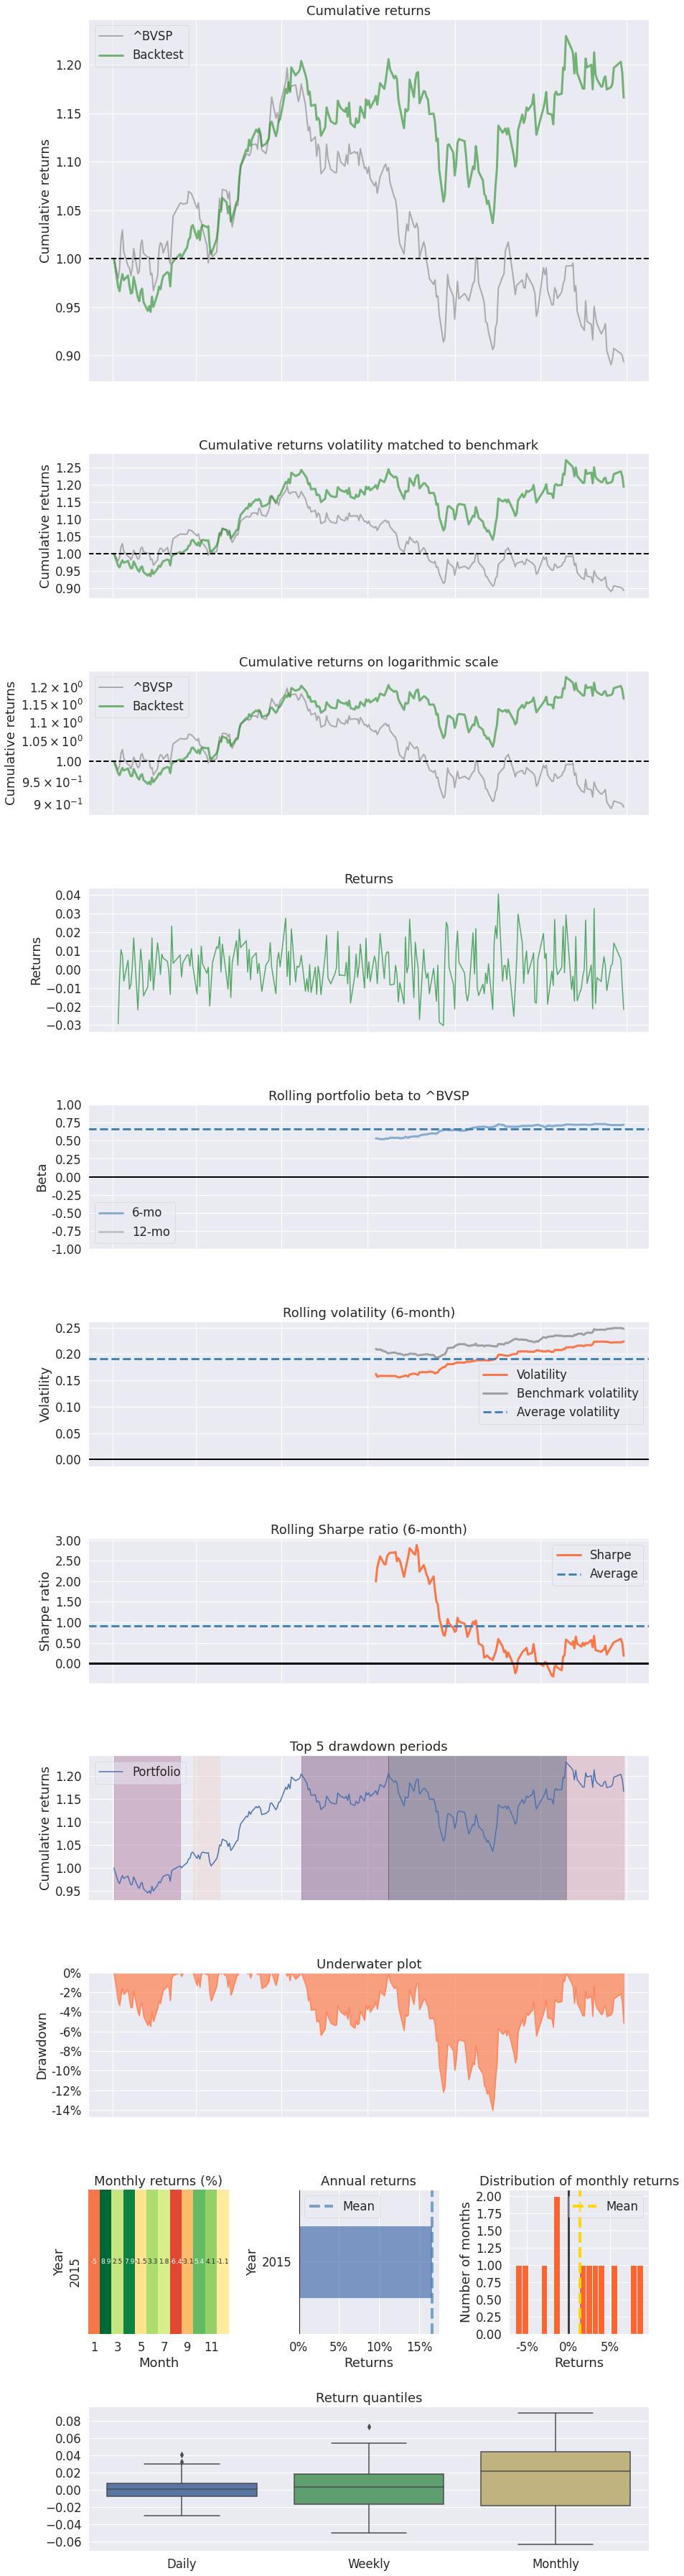

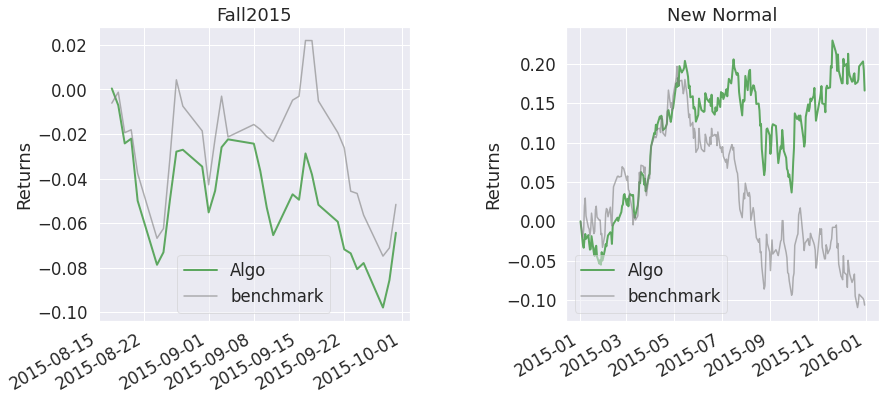

In [47]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])